# Assignment 3: Convolutional neural networks for classification

### First, import the relevant functions.

In [5]:
import os

import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow import keras

import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc

# the size of the images in the PCAM dataset
IMAGE_SIZE = 96

### Next, Get the model and data generators.

In [6]:
from cnn import get_model
from cnn import get_pcam_generators

# get the model
model = get_model()

# get the data generators
train_gen, val_gen = get_pcam_generators('C:/Users/20182054/Documents/BIA Data')

Found 144000 images belonging to 2 classes.
Found 16000 images belonging to 2 classes.


### Training and evaluating the model

Finally, the model can be trained using data generated by the data generators and then evaluated. This is done in a similar way to the previous assignment. One notable exception is that now the `fit_generator()` function is used, which works with data generators instead of a dataset that is fully stored in memory. Furthermore, in addition to the Tensorflow callback, an additional callback that saves the "best" version of the trained model to a file is added, and the model structure is saved to a json file. This enables loading the model and corresponding weights at a later time point (e.g. when we want to evaluate the model on a test set). 

In [7]:
# save the model and weights
model_name = 'my_first_cnn_model'
model_filepath = model_name + '.json'
weights_filepath = model_name + '_weights.hdf5'

model_json = model.to_json() # serialize model to JSON
with open(model_filepath, 'w') as json_file:
    json_file.write(model_json) 


# define the model checkpoint and Tensorboard callbacks
checkpoint = ModelCheckpoint(weights_filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
tensorboard = TensorBoard(os.path.join('logs', model_name))
callbacks_list = [checkpoint, tensorboard]


# train the model
train_steps = train_gen.n//train_gen.batch_size
val_steps = val_gen.n//val_gen.batch_size

history = model.fit_generator(train_gen, steps_per_epoch=train_steps, 
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    epochs=3,
                    callbacks=callbacks_list)

C:\Users\20182054\Anaconda3\envs\8p361\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
4500/4500 [==============================] - 1514s 336ms/step - loss: 0.5164 - accuracy: 0.7373 - val_loss: 0.4241 - val_accuracy: 0.8017

Epoch 00001: val_loss improved from inf to 0.42407, saving model to my_first_cnn_model_weights.hdf5
Epoch 2/3
4500/4500 [==============================] - 1291s 287ms/step - loss: 0.3993 - accuracy: 0.8227 - val_loss: 0.3466 - val_accuracy: 0.8474

Epoch 00002: val_loss improved from 0.42407 to 0.34663, saving model to my_first_cnn_model_weights.hdf5
Epoch 3/3
4500/4500 [==============================] - 1294s 288ms/step - loss: 0.3439 - accuracy: 0.8527 - val_loss: 0.3487 - val_accuracy: 0.8451

Epoch 00003: val_loss did not improve from 0.34663


## Exercise 1

The PatchCAMELYON challenge on Kaggle uses the area under the ROC curve as an evaluation measure. Describe the concept of ROC curve analysis and the area under the ROC curve (AUC) as an evaluation measure. Then, using methods from the sklearn Python toolbox (the required functions are alerady imported), perform ROC curve analysis and computation of the AUC for your model. 

Note that you will have to do this analysis on the validation set (since you do not have access to the ground truth for the test set). 

### 1.1 Store trained model

In [7]:
model.save('C:/Users/20182054/Documents')

INFO:tensorflow:Assets written to: C:/Users/20182054/Documents\assets


### 1.2 Load stored model

In [8]:
model = keras.models.load_model('C:/Users/20182054/Documents')

### 1.3 ROC curve analysis and AUC computation

C:\Users\20182054\Anaconda3\envs\8p361\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


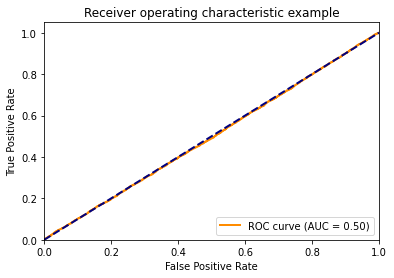

array([0.00000e+00, 0.00000e+00, 1.25000e-04, ..., 9.99625e-01,
       9.99625e-01, 1.00000e+00])

In [9]:
from cnn import ROC_curve

ROC_curve(model, val_gen)

## Exercise 2

It is possible to construct a neural network model that is equivalent to the model above, however, only using convolutional layers (i.e. without using any fully connected or "dense" layers). Construct and train such a model. 

What would be the advantage of only using convolutional layers?


## Exercise 3

Use the `kaggle_submission.py` file to prepare and submit results for evaluation to Kaggle. What is the result of the evaluation on the test set? How does it compare to the evaluation that you performed on the validation set?

## Submission checklist

* Exercise 1: Answer to the questions and code
* Exercise 2: Answer to the questions and code
* Exercise 3: Answer to the questions and code